In [3]:
using DataFrames
using CSV
using StatsPlots

In [2]:
withdraw_transactions_df = CSV.read("../data/tornado_withdraw_df.csv", DataFrame)
deposit_transactions_df = CSV.read("../data/deposit_transactions.csv", DataFrame);

In [40]:
function get_number_of_transactions(address, transactions_df, df_address_column)
    
    # The number of withdraws is initialized at 1 since the withdraw_transaction of the first argument is always present
    # in the withdrawal data. Also, the count should be 1 if there is no other transaction with the same address.
    
    n_withdraws = 1
    
    # This for loop counts the number of transactions with the same address. At the end, the total number is returned.
    # The count is done considering that the recipient_address of each of the transactions in the withdraw_transactions_df
    # is the same as the recipient_address of the withdraw_transaction input, and that the timestamp of the rows is earlier
    # than the withdraw_transaction input. 
    # The if clause also filters by the transaction hash, since we don't want to count the same transaction two times.
    
    for row ∈ eachrow(transactions_df)
        if row[df_address_column] == address
            n_withdraws += 1
        end
    end
    return n_withdraws
end

get_number_of_transactions (generic function with 2 methods)

In [5]:
function get_same_number_of_deposits(n_withdraws, deposit_transactions_df)
    
    # The deposits transactions data is first grouped by address, and then combined to get a new 
    # DataFrame with the addresses and their corresponding counts.
    
    deposits_with_same_number = combine(groupby(deposit_transactions_df, :from_address), nrow => :count)
    
    # The addresses are filtered by the number of counts. Only the ones that are equal or larger than the input
    # n_withdraws are returned. Finally, the output of the function is an array with the matching addresses.
    
    return filter(row -> row.count >= n_withdraws, deposits_with_same_number)[!, :from_address]
end

get_same_number_of_deposits (generic function with 1 method)

In [27]:
function get_number_of_transactions_for_all_addresses(address_list, transactions_df, df_address_column)
    transactions_count = Dict()
    for address in address_list
        transactions_count[address] = get_number_of_transactions(address, transactions_df, df_address_column)
    end
    transactions_count
end     

get_number_of_transactions_for_all_addresses (generic function with 2 methods)

In [30]:
withdraw_addresses = withdraw_transactions_df[!, :recipient_address] |> unique
deposit_addresses = deposit_transactions_df[!, :from_address] |> unique;

In [32]:
withdraw_address_to_transactions = get_number_of_transactions_for_all_addresses(withdraw_addresses, withdraw_transactions_df, :recipient_address)
deposit_address_to_transactions = get_number_of_transactions_for_all_addresses(deposit_addresses, deposit_transactions_df, :from_address);

In [19]:
withdraw_addresses_count = address_to_transactions |> values |> collect;

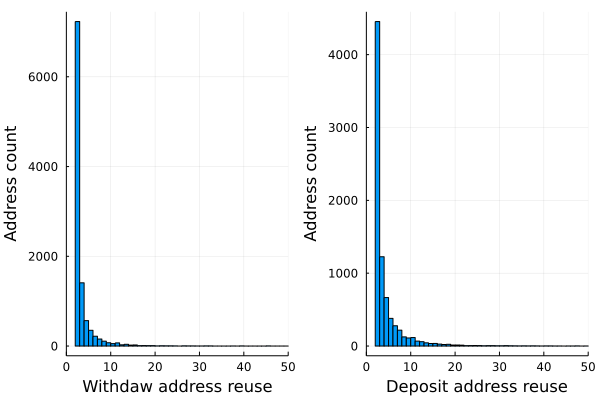

In [39]:
h_withdraws = histogram(withdraw_addresses_count, bins=100, xrange=(0, 50), legend=false,
    xlabel="Withdaw address reuse", ylabel="Address count")
h_deposits = histogram(deposit_address_to_transactions, bins=200, xrange=(0, 50), legend=false,
    xlabel="Deposit address reuse", ylabel="Address count")
plot(h_withdraws, h_deposits, layout=(1, 2))